## Analyse les donnees d'airbnb a Paris 

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
listings = read.csv("listings.csv", header=TRUE)

In [3]:
calendar = read.csv("calendar.csv", header=TRUE)

In [4]:
head(listings,5)

id   listing_url                       scrape_id    last_scraped
1 2577 https://www.airbnb.com/rooms/2577 2.020101e+13 2020-10-19  
2 3109 https://www.airbnb.com/rooms/3109 2.020101e+13 2020-10-18  
3 4886 https://www.airbnb.com/rooms/4886 2.020101e+13 2020-10-18  
4 4890 https://www.airbnb.com/rooms/4890 2.020101e+13 2020-10-14  
5 5396 https://www.airbnb.com/rooms/5396 2.020101e+13 2020-10-15  
  name                                            
1 Loft for 4 by Canal Saint Martin                
2 zen and calm                                    
3 Country-Style Studio Hip Area FREE CRUISE & WIFI
4 Quiet Historic & Cute  +Free Cruise             
5 Explore the heart of old Paris                  
  description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
1 100 m2 loft (1100 sq feet) with high ceiling, open modern kitchen, cable tv, wifi, sleeping space up to 5 people, Republique area, 5 minutes from the St Martin Canal, Marais area, 10 min from Chatelet and the Louvre.<br /><br /><b>The space</b><br />The district has any service or shop you may desire at a walking distance, many restaurants and clubs as well. <br />I will be pleased to suggest our best addresses and give you directions to have a very enjoyable journey. <br />We have 1 separated bedroom and one mezzanine for the second bed. One bathroom is "en suite" to the main bedroom. <br />Welcome to our beautiful loft!<br />Karine                                                                                                                                                                                                                                                                                                                                                                       
2 <b>The space</b><br />I bedroom appartment in Paris 14                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
3 Bright and Cozy Studio Apartment for  2 Guests. Enjoy Great Authentic and Central Location near Canal St Martin and Republique. Historic Building with Elevator. <br />Outdoor Market a block away. Steps to Trendy Rue Oberkampf & Hip Canal St Martin. Minutes to the Marais District or 

In [5]:
dim(listings)

[1] 66334    74

In [6]:
# check missing values
sapply(listings, function(x) sum(is.na(x)))

id 
                                           0 
                                 listing_url 
                                           0 
                                   scrape_id 
                                           0 
                                last_scraped 
                                           0 
                                        name 
                                           1 
                                 description 
                                           0 
                       neighborhood_overview 
                                           0 
                                 picture_url 
                                           0 
                                     host_id 
                                           0 
                                    host_url 
                                           0 
                                   host_name 
                                           0 
                                  host_since 
                                           0 
                               host_location 
                                           0 
                                  host_about 
                                           1 
                          host_response_time 
                                           0 
                          host_response_rate 
                                           0 
                        host_acceptance_rate 
                                           0 
                           host_is_superhost 
                                           0 
                          host_thumbnail_url 
                                           0 
                            host_picture_url 
                                           0 
                          host_neighbourhood 
                                           0 
                         host_listings_count 
                                          20 
                   host_total_listings_count 
                                          20 
                          host_verifications 
                                           0 
                        host_has_profile_pic 
                                           0 
                      host_identity_verified 
                                           0 
                               neighbourhood 
                                           0 
                      neighbourhood_cleansed 
                                           0 
                neighbourhood_group_cleansed 
                                       66334 
                                    latitude 
                                           0 
                                   longitude 
                                           0 
                               property_type 
                                           0 
                                   room_type 
                                           0 
                                accommodates 
                                           0 
                                   bathrooms 
                                       66334 
                              bathrooms_text 
                                           0 
                                    bedrooms 
                                       13661 
                                        beds 
                                         557 
                                   amenities 
                                           0 
                                       price 
                                           0 
                              minimum_nights 
                                           0 
                              maximum_nights 
                                           0 
                      minimum_minimum_nights 
                                          12 
                      maximum_minimum_nights 
                                        

In [7]:
df_accommodates <- listings %>% select(id,accommodates,instant_bookable)

In [8]:
sapply(listings, class)

id 
                                   "integer" 
                                 listing_url 
                                    "factor" 
                                   scrape_id 
                                   "numeric" 
                                last_scraped 
                                    "factor" 
                                        name 
                                    "factor" 
                                 description 
                                    "factor" 
                       neighborhood_overview 
                                    "factor" 
                                 picture_url 
                                    "factor" 
                                     host_id 
                                   "integer" 
                                    host_url 
                                    "factor" 
                                   host_name 
                                    "factor" 
                                  host_since 
                                    "factor" 
                               host_location 
                                    "factor" 
                                  host_about 
                                    "factor" 
                          host_response_time 
                                    "factor" 
                          host_response_rate 
                                    "factor" 
                        host_acceptance_rate 
                                    "factor" 
                           host_is_superhost 
                                    "factor" 
                          host_thumbnail_url 
                                    "factor" 
                            host_picture_url 
                                    "factor" 
                          host_neighbourhood 
                                    "factor" 
                         host_listings_count 
                                   "integer" 
                   host_total_listings_count 
                                   "integer" 
                          host_verifications 
                                    "factor" 
                        host_has_profile_pic 
                                    "factor" 
                      host_identity_verified 
                                    "factor" 
                               neighbourhood 
                                    "factor" 
                      neighbourhood_cleansed 
                                    "factor" 
                neighbourhood_group_cleansed 
                                   "logical" 
                                    latitude 
                                   "numeric" 
                                   longitude 
                                   "numeric" 
                               property_type 
                                    "factor" 
                                   room_type 
                                    "factor" 
                                accommodates 
                                   "integer" 
                                   bathrooms 
                                   "logical" 
                              bathrooms_text 
                                    "factor" 
                                    bedrooms 
                                   "integer" 
                                        beds 
                                   "integer" 
                                   amenities 
                                    "factor" 
                                       price 
                                    "factor" 
                              minimum_nights 
                                   "integer" 
                              maximum_nights 
                                   "integer" 
                      minimum_minimum_nights 
                                   "integer" 
                      maximum_minimum_nights 
                                   "inte

In [9]:
head(calendar,5)

listing_id date       available price   adjusted_price minimum_nights
1  2577      2020-10-19 f         $125.00 $125.00        3             
2 73533      2020-10-20 t         $95.00  $95.00         2             
3 73533      2020-10-21 t         $95.00  $95.00         2             
4 73533      2020-10-22 t         $95.00  $95.00         2             
5 73533      2020-10-23 t         $95.00  $95.00         2             
  maximum_nights
1 1125          
2 1125          
3 1125          
4 1125          
5 1125

In [10]:
dim(calendar)

[1] 24214662        7

In [11]:
# check missing values
sapply(calendar, function(x) sum(is.na(x)))

listing_id           date      available          price adjusted_price 
             0              0              0              0              0 
minimum_nights maximum_nights 
          7487           7487

In [12]:
new_calendar <- calendar %>% filter(price!="" & adjusted_price!="")

In [13]:
# remove "$" in price and adjusted_price
new_calendar$price <- substring(new_calendar$price, 2)
new_calendar$adjusted_price <- substring(new_calendar$adjusted_price, 2)

In [14]:
# change "," into "" in price and adjusted_price
new_calendar$price <- gsub(",", "", new_calendar$price)
new_calendar$adjusted_price <- gsub(",", "", new_calendar$adjusted_price)

In [15]:
sapply(new_calendar, function(x) sum(is.na(x)))

listing_id           date      available          price adjusted_price 
             0              0              0              0              0 
minimum_nights maximum_nights 
          7102           7102

In [16]:
sapply(new_calendar, class)

listing_id           date      available          price adjusted_price 
     "integer"       "factor"       "factor"    "character"    "character" 
minimum_nights maximum_nights 
     "integer"      "integer"

In [17]:
# convert char to int for price and adjusted_price
new_calendar$price <- as.numeric(new_calendar$price)
new_calendar$adjusted_price <- as.numeric(new_calendar$adjusted_price)

In [18]:
head(new_calendar)

listing_id date       available price adjusted_price minimum_nights
1  2577      2020-10-19 f         125   125            3             
2 73533      2020-10-20 t          95    95            2             
3 73533      2020-10-21 t          95    95            2             
4 73533      2020-10-22 t          95    95            2             
5 73533      2020-10-23 t          95    95            2             
6 73533      2020-10-24 t          95    95            2             
  maximum_nights
1 1125          
2 1125          
3 1125          
4 1125          
5 1125          
6 1125

In [19]:
sapply(new_calendar, function(x) sum(is.na(x)))

listing_id           date      available          price adjusted_price 
             0              0              0              0              0 
minimum_nights maximum_nights 
          7102           7102

In [20]:
avg_price <- new_calendar %>% select(listing_id,price) %>% group_by(listing_id) %>% summarise(avg_price=mean(price))

`summarise()` ungrouping output (override with `.groups` argument)



Warning message:
“Removed 11595 rows containing non-finite values (stat_boxplot).”
Saving 6.67 x 6.67 in image

Warning message:
“Removed 11595 rows containing non-finite values (stat_boxplot).”


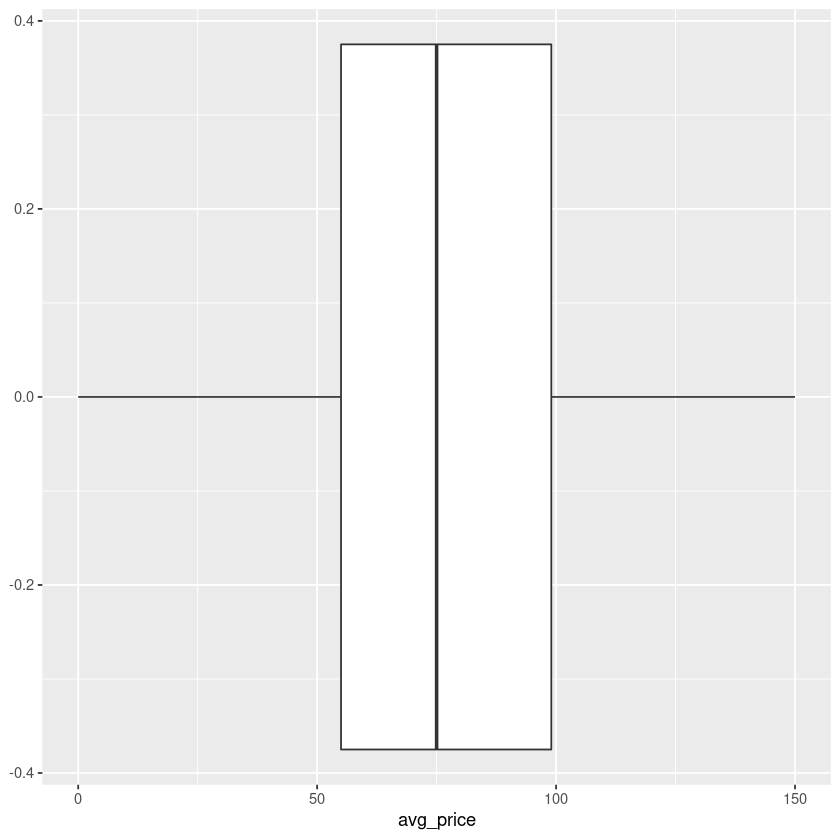

In [72]:

ggplot(avg_price, aes(x=avg_price)) + geom_boxplot() + xlim(c(0,150))
ggsave("avg_price_box.png")

Warning message:
“Removed 11595 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Saving 6.67 x 6.67 in image

Warning message:
“Removed 11595 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


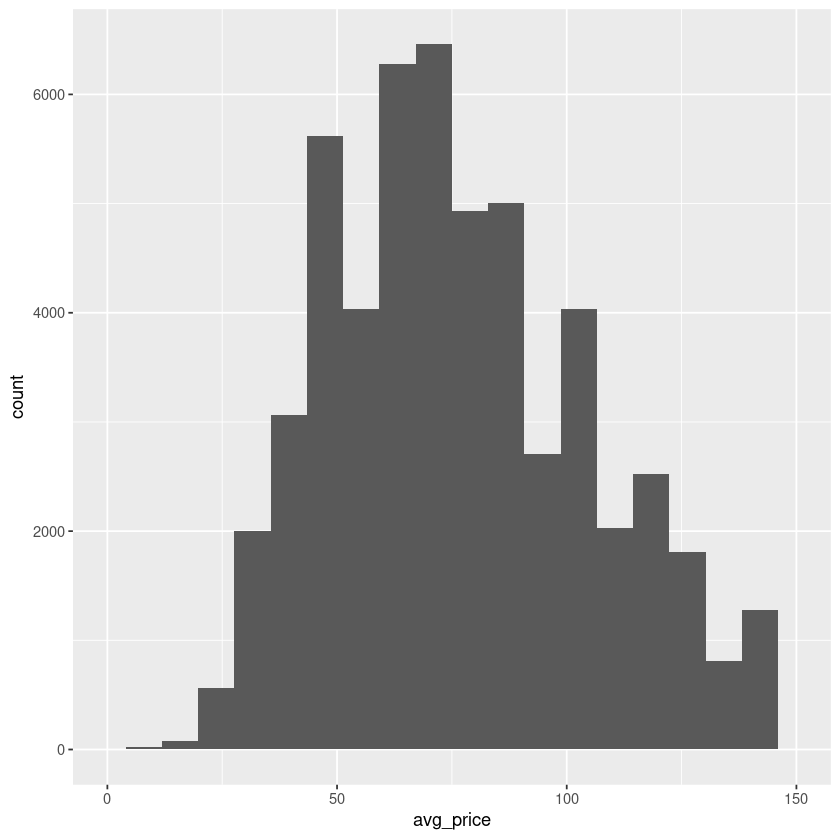

In [73]:
ggplot(avg_price, aes(x=avg_price)) + geom_histogram(bins=20) + xlim(c(0,150))
ggsave("avg_price_histogram.png")

In [23]:
avg_adjusted_price <- new_calendar %>% select(listing_id,adjusted_price) %>% group_by(listing_id) %>% summarise(avg_adjusted_price=mean(adjusted_price))

`summarise()` ungrouping output (override with `.groups` argument)



Warning message:
“Removed 11448 rows containing non-finite values (stat_boxplot).”


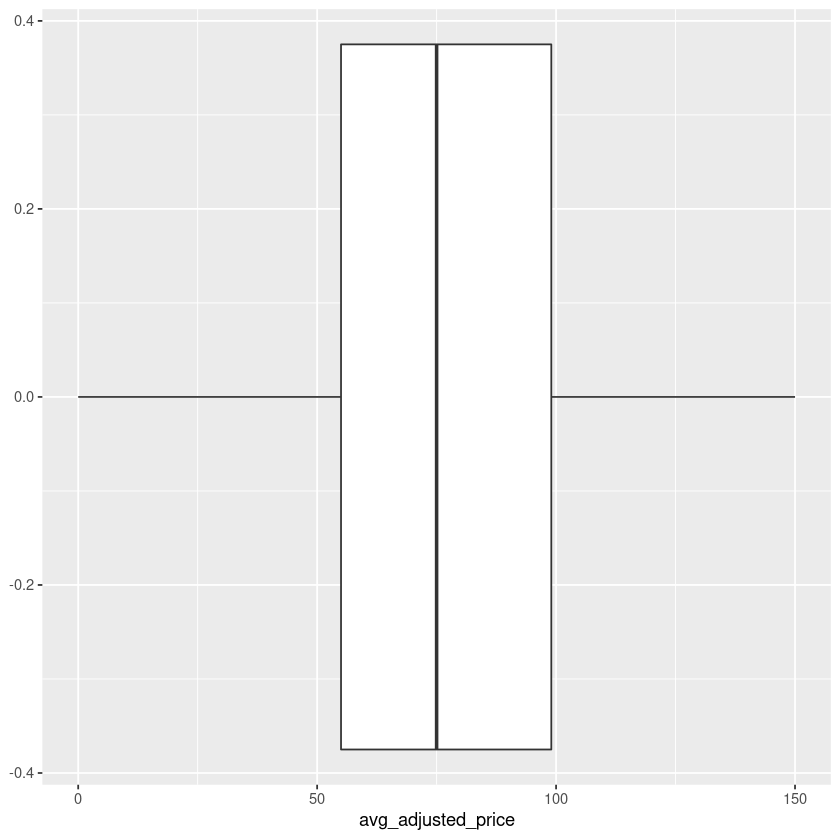

In [24]:
ggplot(avg_adjusted_price, aes(x=avg_adjusted_price)) + geom_boxplot() + xlim(c(0,150))

Warning message:
“Removed 11448 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


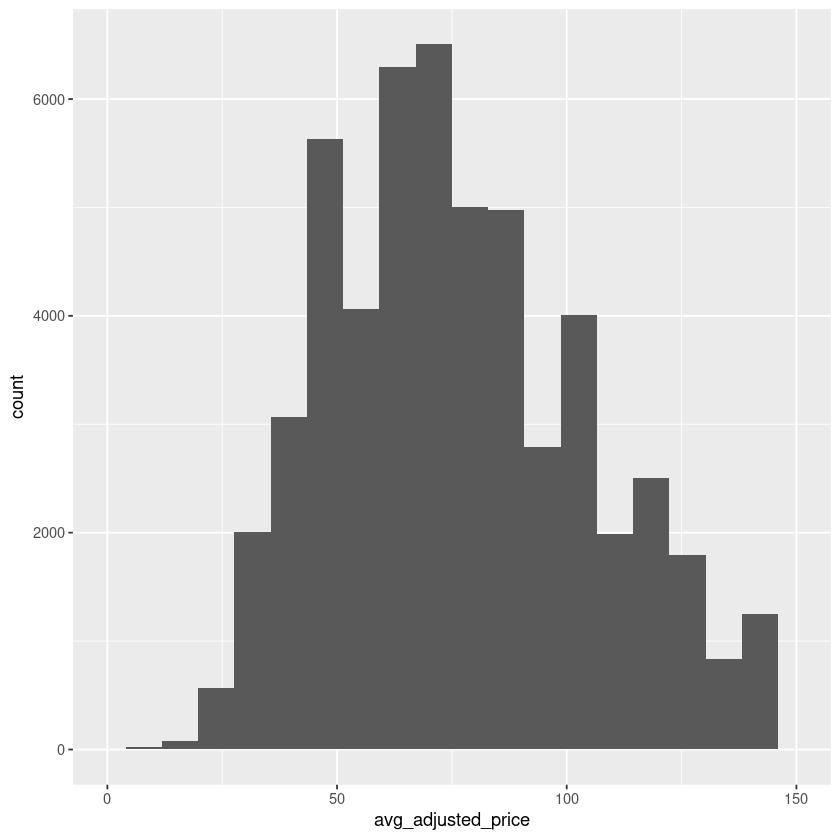

In [25]:
ggplot(avg_adjusted_price, aes(x=avg_adjusted_price)) + geom_histogram(bins=20) + xlim(c(0,150))

In [26]:
date_avg_price <- new_calendar %>% select(date,price) %>% group_by(date) %>% summarise(avg_price=mean(price))

`summarise()` ungrouping output (override with `.groups` argument)



In [27]:
date_avg_price$date <- as.Date(date_avg_price$date)

Saving 6.67 x 6.67 in image



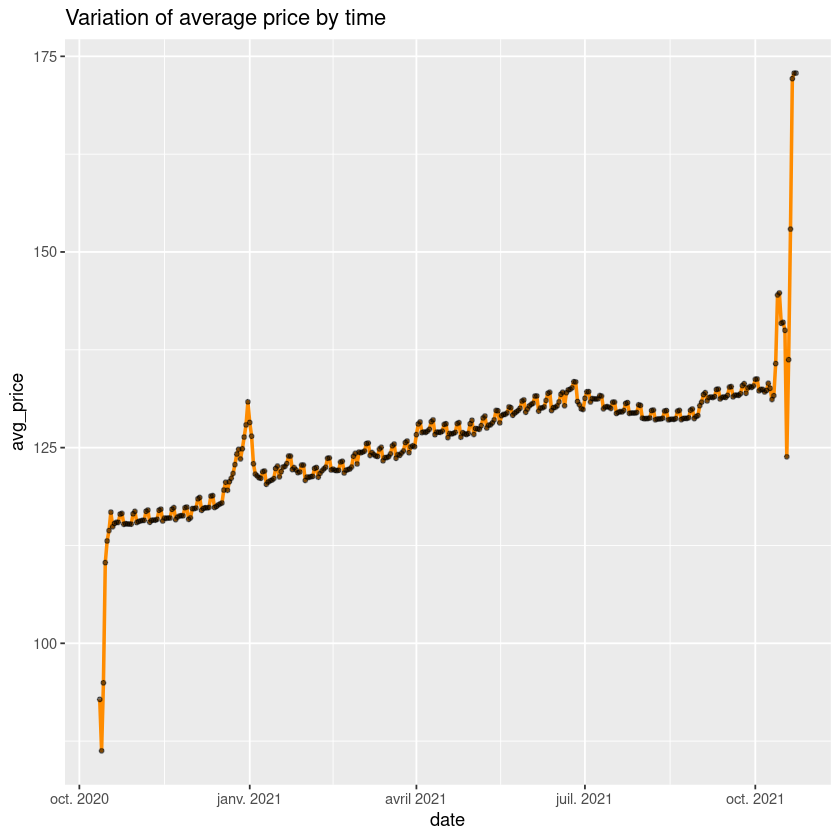

In [74]:
ggplot(date_avg_price,aes(x=date,y=avg_price)) + geom_line(color = "darkorange", size = 1) + geom_point(size=1, alpha=0.5) +
labs(title="Variation of average price by time")
ggsave("Variation of average price by time.png")

In [29]:
date_available <- new_calendar %>% select(date,available) %>% filter(available=="t") %>% group_by(date) %>% count(available)
date_available$date <- as.Date(date_available$date)

Saving 6.67 x 6.67 in image



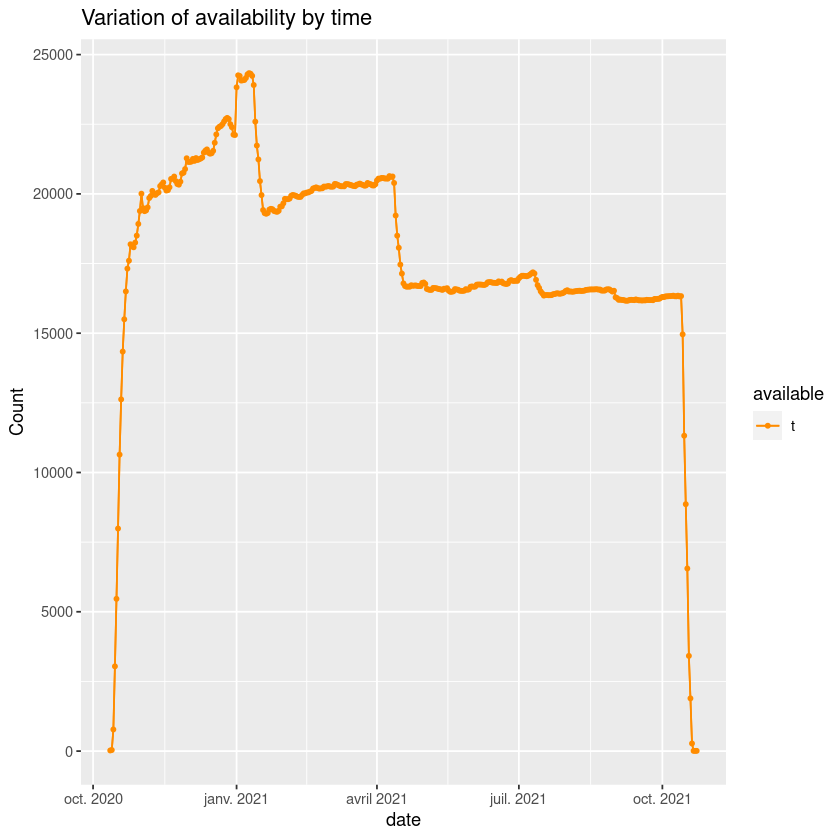

In [75]:
ggplot(date_available,aes(x=date,y=n,group=available,color=available)) + geom_line(size = 0.5) +
  geom_point(size=1)+
  geom_line() +
  scale_color_manual(values=c("darkorange","darkblue")) +
  ylab("Count") +
  labs(title="Variation of availability by time")
ggsave("Variation of availability by time.png")


In [31]:
new_listings = read.csv("reduc_listings.csv",header=TRUE)

In [32]:
head(new_listings)

id   name                                             host_id
1 2577 Loft for 4 by Canal Saint Martin                 2827   
2 3109 zen and calm                                     3631   
3 4886 Country-Style Studio Hip Area FREE CRUISE & WIFI 6792   
4 4890 Quiet Historic & Cute  +Free Cruise              6792   
5 5396 Explore the heart of old Paris                   7903   
6 7397 MARAIS - 2ROOMS APT - 2/4 PEOPLE                 2626   
  host_name           neighbourhood_group neighbourhood  latitude longitude
1 Karine              NA                  Entrepôt       48.86993 2.36251  
2 Anne                NA                  Observatoire   48.83349 2.31852  
3 Ryan Of Cobblestone NA                  Popincourt     48.86528 2.37115  
4 Ryan Of Cobblestone NA                  Temple         48.86409 2.35651  
5 Borzou              NA                  Hôtel-de-Ville 48.85100 2.35869  
6 Franck              NA                  Hôtel-de-Ville 48.85886 2.35316  
  room_type       price minimum_nights number_of_reviews last_review
1 Entire home/apt 125   3                1               2019-01-02 
2 Entire home/apt  60   2                9               2019-10-24 
3 Entire home/apt  89   3               25               2019-05-06 
4 Entire home/apt 103   4               23               2020-09-07 
5 Entire home/apt  48   1              225               2020-08-08 
6 Entire home/apt  94   6              269               2020-08-15 
  reviews_per_month calculated_host_listings_count availability_365
1 0.05               1                             321             
2 0.19               1                             365             
3 0.18              11                               0             
4 0.21              11                              72             
5 1.64               1                              76             
6 2.32               1                             320

Saving 6.67 x 6.67 in image



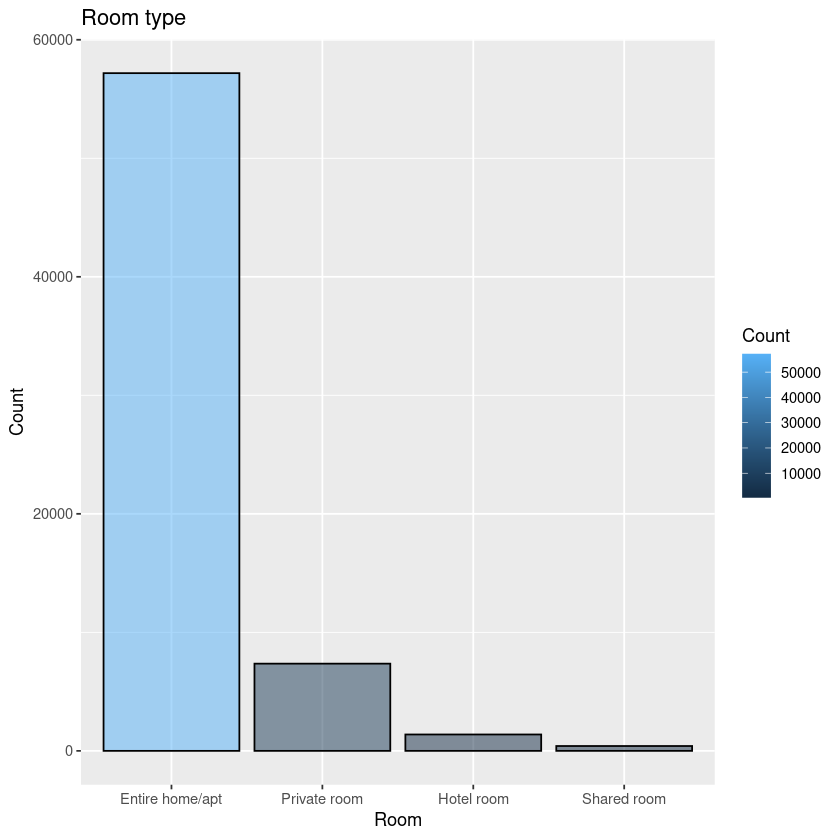

In [76]:
room_type <- new_listings %>% select(room_type) %>% count(room_type)
ggplot(room_type) + geom_bar(aes(reorder(room_type,-n), n, fill=n), col="black", alpha = .5, stat = "identity") + 
scale_fill_gradient("Count") +
labs(title="Room type") +
labs(x="Room", y="Count")
ggsave("Room type.png")

In [34]:
neighbourhood <- new_listings %>% select(neighbourhood) %>% count(neighbourhood) %>% arrange(desc(n))

Saving 6.67 x 6.67 in image



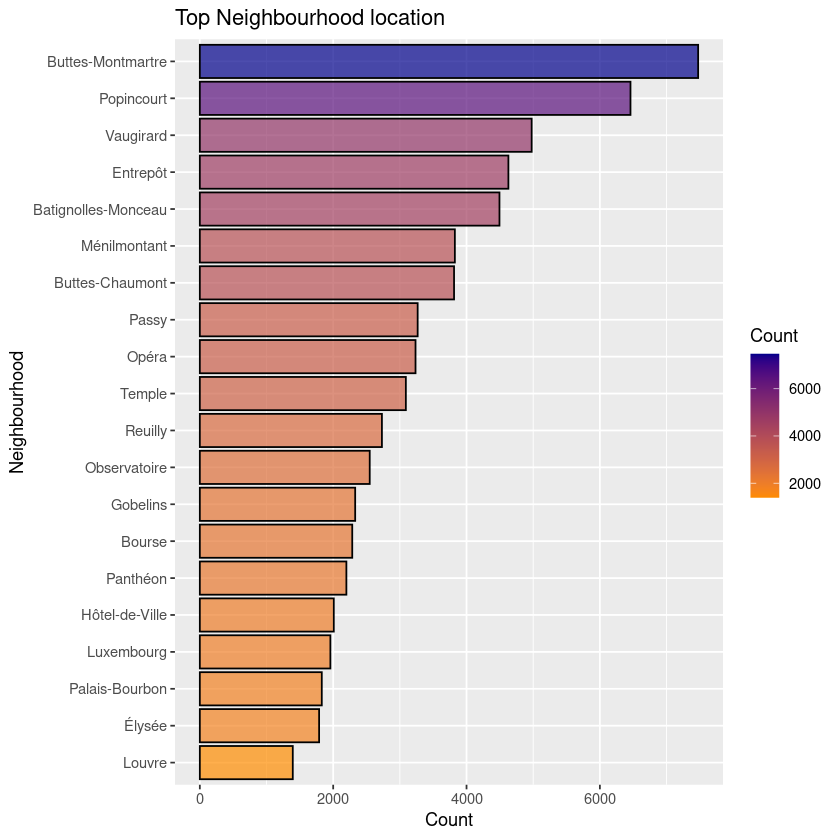

In [77]:
ggplot(neighbourhood) +
geom_bar(aes(reorder(neighbourhood, n), n, fill=n),
    col="black", alpha = .7, stat="identity") +
scale_fill_gradient("Count", low = "darkorange", high = "darkblue") +
scale_y_continuous() +
labs(title="Top Neighbourhood location") +
labs(x="Neighbourhood", y="Count") + coord_flip()
ggsave("Top Neighbourhood location.png")

In [36]:
price <- new_listings %>% select(price) %>% count(price) %>% arrange(desc(n))

Saving 6.67 x 6.67 in image



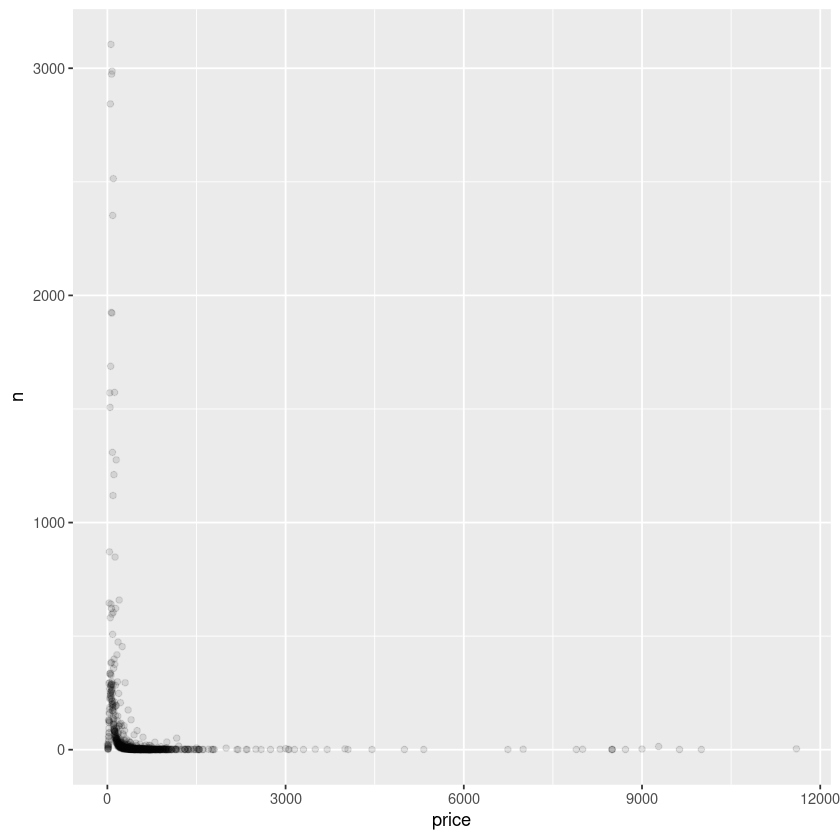

In [78]:
ggplot(price) + geom_point(aes(x=price,y=n),alpha = .1)
ggsave("price par scatterplot.png")

Warning message:
“Removed 90 rows containing missing values (geom_point).”
Saving 6.67 x 6.67 in image

Warning message:
“Removed 90 rows containing missing values (geom_point).”


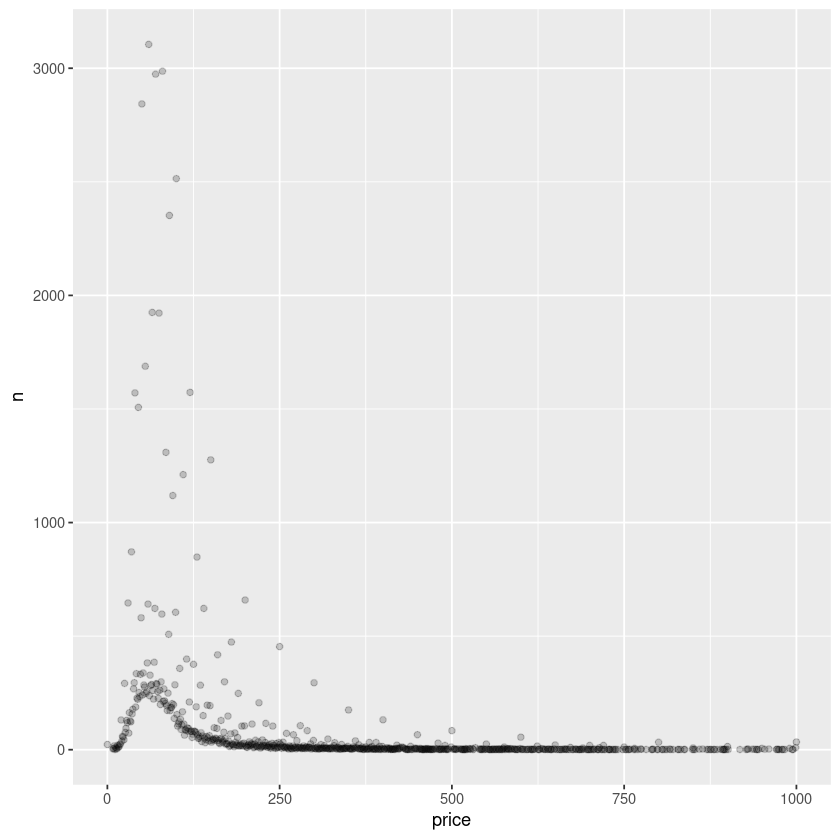

In [79]:
ggplot(price) + geom_point(aes(x=price,y=n),alpha = .2) + xlim(c(0,1000))
ggsave("price par scatterplot with less 1000$.png")

In [39]:
n_price <- new_listings %>% select(price) %>% mutate(range=price %/% 50) %>% select(range) %>% count(range) %>%
    mutate(range_price = case_when(range == 0 ~ "0-49",
                                   range == 1 ~ "50-99",
                                   range == 2 ~ "100-149",
                                   range == 3 ~ "150-199",
                                   range == 4 ~ "200-249",
                                   range == 5 ~ "250-299",
                                   range == 6 ~ "300-349",
                                   range == 7 ~ "350-399",
                                   range == 8 ~ "400-449",
                                   range == 9 ~ "450-499",
                                   range >= 10 ~ "> 500")) %>%
    group_by(range_price) %>% summarise(count=sum(n))

`summarise()` ungrouping output (override with `.groups` argument)



Saving 6.67 x 6.67 in image



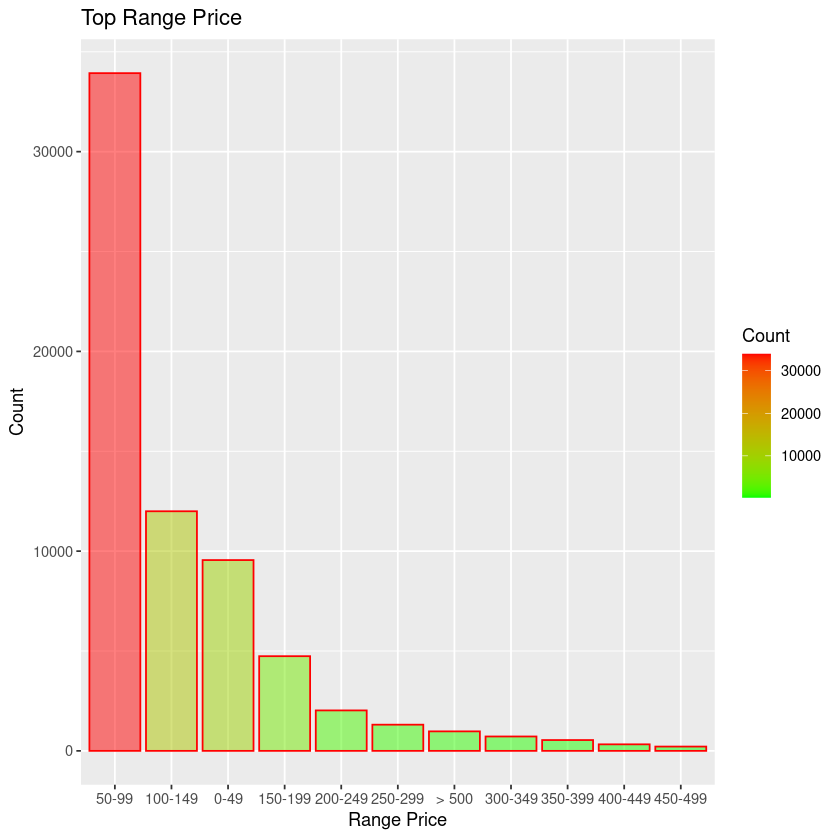

In [80]:
ggplot(n_price) +
geom_bar(aes(reorder(range_price, -count), count, fill=count),
    col="red", alpha = .5, stat="identity") +
scale_fill_gradient("Count", low = "green", high = "red") +
scale_y_continuous() +
labs(title="Top Range Price") +
labs(x="Range Price", y="Count")
ggsave("Top Range Price.png")

In [41]:
new_df <- merge(new_listings, df_accommodates, by = "id")

In [42]:
head(new_df)

id   name                                             host_id
1 2577 Loft for 4 by Canal Saint Martin                 2827   
2 3109 zen and calm                                     3631   
3 4886 Country-Style Studio Hip Area FREE CRUISE & WIFI 6792   
4 4890 Quiet Historic & Cute  +Free Cruise              6792   
5 5396 Explore the heart of old Paris                   7903   
6 7397 MARAIS - 2ROOMS APT - 2/4 PEOPLE                 2626   
  host_name           neighbourhood_group neighbourhood  latitude longitude
1 Karine              NA                  Entrepôt       48.86993 2.36251  
2 Anne                NA                  Observatoire   48.83349 2.31852  
3 Ryan Of Cobblestone NA                  Popincourt     48.86528 2.37115  
4 Ryan Of Cobblestone NA                  Temple         48.86409 2.35651  
5 Borzou              NA                  Hôtel-de-Ville 48.85100 2.35869  
6 Franck              NA                  Hôtel-de-Ville 48.85886 2.35316  
  room_type       price minimum_nights number_of_reviews last_review
1 Entire home/apt 125   3                1               2019-01-02 
2 Entire home/apt  60   2                9               2019-10-24 
3 Entire home/apt  89   3               25               2019-05-06 
4 Entire home/apt 103   4               23               2020-09-07 
5 Entire home/apt  48   1              225               2020-08-08 
6 Entire home/apt  94   6              269               2020-08-15 
  reviews_per_month calculated_host_listings_count availability_365
1 0.05               1                             321             
2 0.19               1                             365             
3 0.18              11                               0             
4 0.21              11                              72             
5 1.64               1                              76             
6 2.32               1                             320             
  accommodates instant_bookable
1 4            t               
2 2            f               
3 2            f               
4 4            t               
5 2            f               
6 4            f

In [83]:
accommodates <- new_df %>% select(accommodates) %>% count(accommodates) 

Saving 6.67 x 6.67 in image



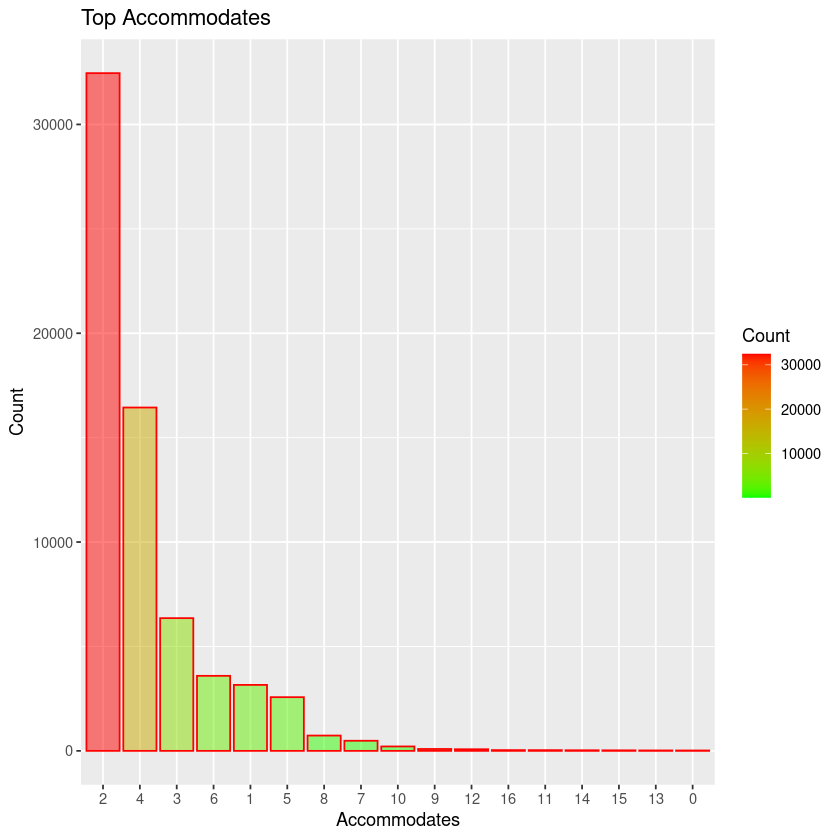

In [85]:
ggplot(accommodates) +
geom_bar(aes(reorder(accommodates, -n), n, fill=n),
    col="red", alpha = .5, stat="identity") +
scale_fill_gradient("Count", low = "green", high = "red") +
scale_y_continuous() +
labs(title="Top Accommodates") +
labs(x="Accommodates", y="Count")
ggsave("Top Accommodates.png")

In [45]:
# Average price for 2 persons accommodation in each neighbourhood
avg_price_2_people_neighbourhood <- new_df %>% select(neighbourhood,price,accommodates) %>% filter(accommodates==2) %>% group_by(neighbourhood) %>% summarise(avg_price=mean(price))

`summarise()` ungrouping output (override with `.groups` argument)



Saving 6.67 x 6.67 in image



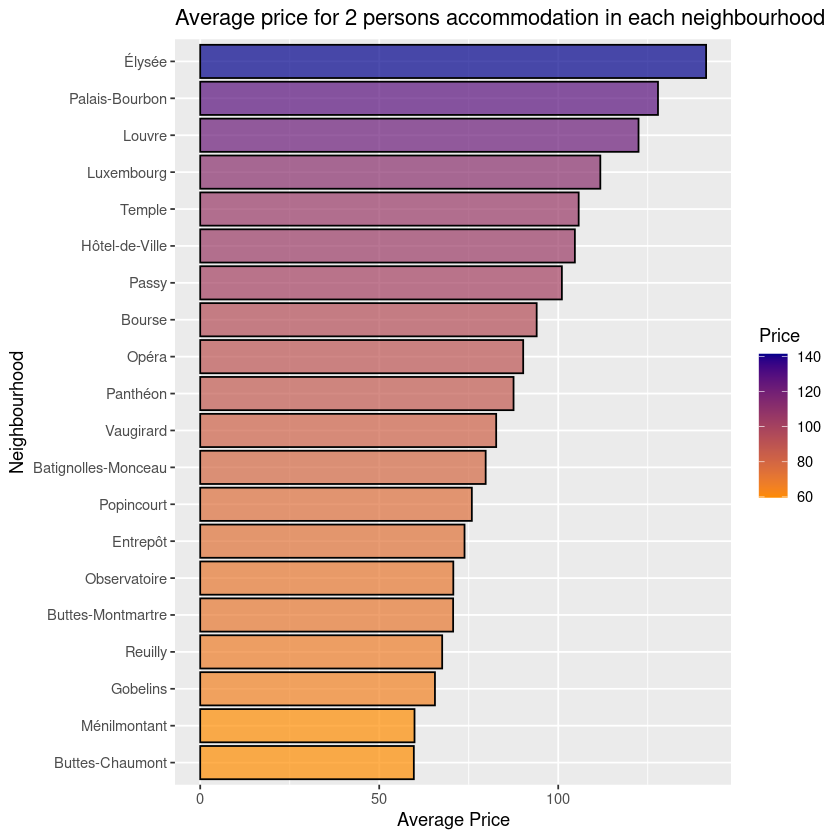

In [86]:
ggplot(avg_price_2_people_neighbourhood) +
geom_bar(aes(reorder(neighbourhood, avg_price), avg_price, fill=avg_price),
    col="black", alpha = .7, stat="identity") +
scale_fill_gradient("Price", low = "darkorange", high = "darkblue") +
scale_y_continuous() +
labs(title="Average price for 2 persons accommodation in each neighbourhood") +
labs(x="Neighbourhood", y="Average Price") + coord_flip()
ggsave("Average price for 2 persons accommodation in each neighbourhood.png")

In [47]:
# Average price of room type in each neighbourhood
room_type_neighbourhood <- new_df %>% select(neighbourhood,room_type,price) %>% group_by(neighbourhood,room_type) %>%
    summarise(avg_price=mean(price))
head(room_type_neighbourhood)

`summarise()` regrouping output by 'neighbourhood' (override with `.groups` argument)



neighbourhood       room_type       avg_price
1 Batignolles-Monceau Entire home/apt 104.40529
2 Batignolles-Monceau Hotel room      171.51000
3 Batignolles-Monceau Private room     75.37238
4 Batignolles-Monceau Shared room      75.90000
5 Bourse              Entire home/apt 146.24939
6 Bourse              Hotel room      231.34091

Saving 6.67 x 6.67 in image



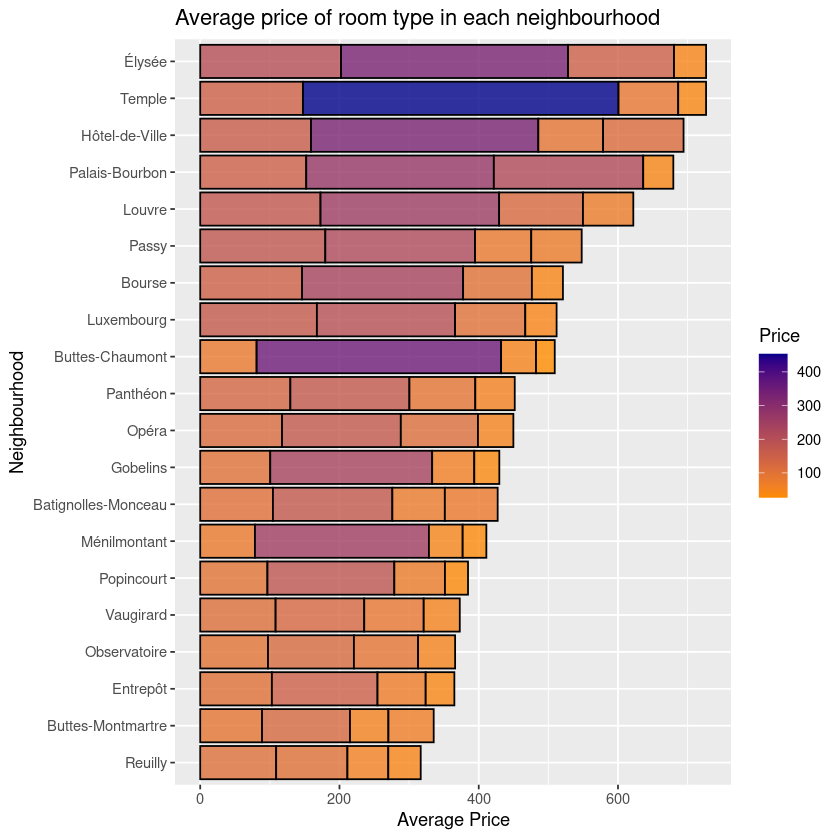

In [87]:
ggplot(room_type_neighbourhood) +
geom_bar(aes(reorder(neighbourhood, avg_price), avg_price, fill=avg_price, color=factor(room_type)),
    col="black", alpha = 0.8, stat="identity") +
scale_fill_gradient("Price", low = "darkorange", high = "darkblue") +
scale_y_continuous() +
labs(title="Average price of room type in each neighbourhood") +
labs(x="Neighbourhood", y="Average Price")+ coord_flip()
ggsave("Average price of room type in each neighbourhood.png")

In [49]:
var <- new_df %>% select(price,minimum_nights,number_of_reviews,calculated_host_listings_count,accommodates)

In [50]:
sapply(var, function(x) sum(is.na(x)))

price                 minimum_nights 
                             0                              0 
             number_of_reviews calculated_host_listings_count 
                             0                              0 
                  accommodates 
                             0

In [51]:
install.packages("corrplot")

Installing package into ‘/home/ukiyo/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



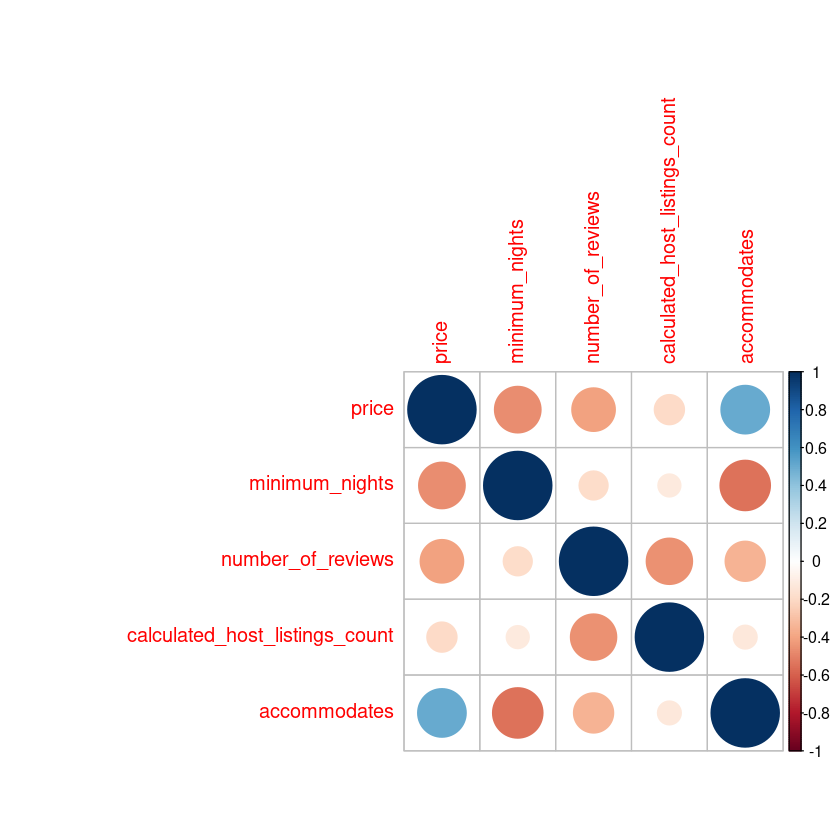

In [89]:
library(corrplot)
var <- cor(var)
corrplot(var)
#ggsave(corrplot.png)

In [53]:
# fort correlation between Price and Accommodates

In [54]:
accommodates <- new_df %>% select(id,accommodates) %>% filter(accommodates==2) %>% rename(listing_id = id)

In [55]:
new_calendar_accommodates <- merge(new_calendar,accommodates,by="listing_id")

In [56]:
with_2_people <- new_calendar_accommodates %>% select(date,price) %>% group_by(date) %>% summarise(avg_price=mean(price))

`summarise()` ungrouping output (override with `.groups` argument)



Saving 6.67 x 6.67 in image



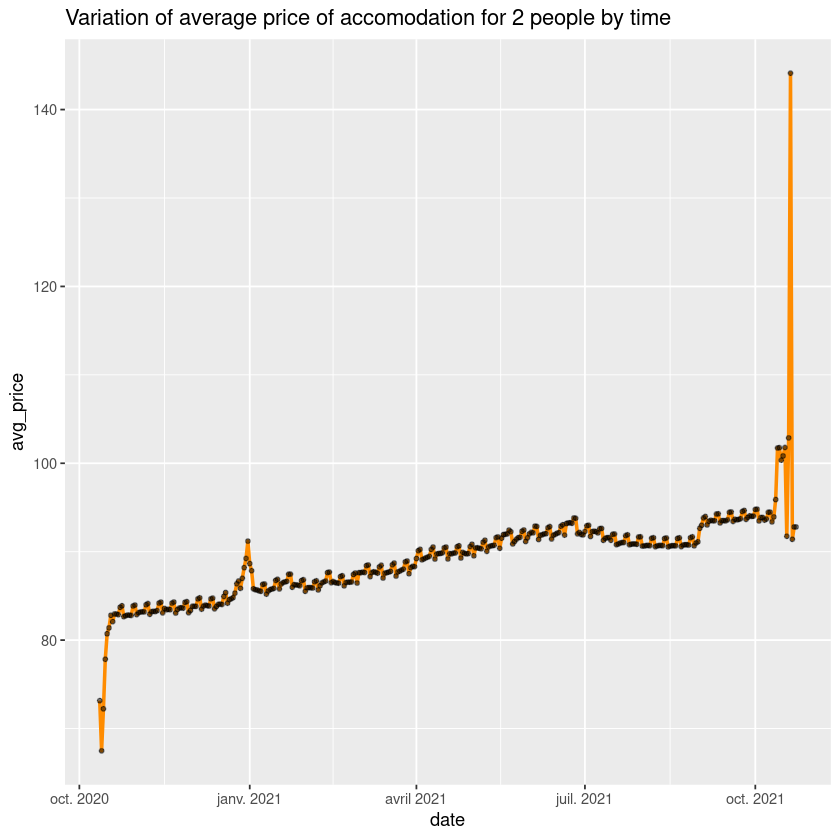

In [90]:
with_2_people$date <- as.Date(with_2_people$date)
ggplot(with_2_people,aes(x=date,y=avg_price)) + geom_line(color = "darkorange", size = 1) + geom_point(size=1, alpha=0.5) +
labs(title="Variation of average price of accomodation for 2 people by time")
ggsave("Variation of average price of accomodation for 2 people by time.png")

In [58]:
install.packages("leaflet")

Installing package into ‘/home/ukiyo/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [59]:
library(leaflet)

m <- leaflet() %>%
  addTiles() %>%  
  addCircleMarkers( 
                      lng = new_df$longitude, 
                      lat = new_df$latitude, 
                      #radius = new_df$size, 
                      weight = 0.5, 
                      stroke = T, opacity = 50,
                      fill = T, fillColor = "#920000", 
                      fillOpacity = 5100,
                      clusterOptions = markerClusterOptions(), 
                      #popup = metrounp$label,
                      color = "white")
m  # Print the map

HTML widgets cannot be represented in plain text (need html)

In [60]:
# host with more than 500 $
new_df_map <- new_df %>% filter(price>=500)

In [61]:
m <- leaflet() %>%
  addTiles() %>%  
  addCircleMarkers( 
                      lng = new_df_map$longitude, 
                      lat = new_df_map$latitude, 
                      #radius = new_df_map$size, 
                      weight = 0.5, 
                      stroke = T, opacity = 50,
                      fill = T, fillColor = "#920000", 
                      fillOpacity = 5100,
                      clusterOptions = markerClusterOptions(), 
                      #popup = metrounp$label,
                      color = "white")
m

HTML widgets cannot be represented in plain text (need html)

In [62]:
# host with less than 50 $ and location has accomodation for more 4 people (family)
new_df_map <- new_df %>% filter(price<=50 & accommodates>=4)

In [63]:
m <- leaflet() %>%
  addTiles() %>%  
  addCircleMarkers( 
                      lng = new_df_map$longitude, 
                      lat = new_df_map$latitude, 
                      #radius = new_df_map$size, 
                      weight = 0.5, 
                      stroke = T, opacity = 50,
                      fill = T, fillColor = "#920000", 
                      fillOpacity = 5100,
                      clusterOptions = markerClusterOptions(), 
                      #popup = metrounp$label,
                      color = "white")
m

HTML widgets cannot be represented in plain text (need html)

In [64]:
# Analyse of Shared room in Paris
shared_room <- new_df %>% filter(room_type=="Shared room")

In [65]:
# Repartition in Paris
m <- leaflet() %>%
  addTiles() %>%  
  addCircleMarkers( 
                      lng = shared_room$longitude, 
                      lat = shared_room$latitude, 
                      #radius = shared_room$size, 
                      weight = 0.5, 
                      stroke = T, opacity = 50,
                      fill = T, fillColor = "#920000", 
                      fillOpacity = 5100,
                      clusterOptions = markerClusterOptions(), 
                      #popup = metrounp$label,
                      color = "white")
m

HTML widgets cannot be represented in plain text (need html)

In [92]:
shared_room_price <- shared_room %>% select(price) %>% mutate(range=price %/% 50) %>% select(range) %>% count(range) %>%
    mutate(range_price = case_when(range == 0 ~ "0-49",
                                   range == 1 ~ "50-99",
                                   range == 2 ~ "100-149",
                                   range == 3 ~ "150-199",
                                   range == 4 ~ "200-249",
                                   range == 5 ~ "250-299",
                                   range == 6 ~ "300-349",
                                   range == 7 ~ "350-399",
                                   range == 8 ~ "400-449",
                                   range == 9 ~ "450-499",
                                   range >= 10 ~ "> 500")) %>%
    group_by(range_price) %>% summarise(count=sum(n))

`summarise()` ungrouping output (override with `.groups` argument)



Saving 6.67 x 6.67 in image



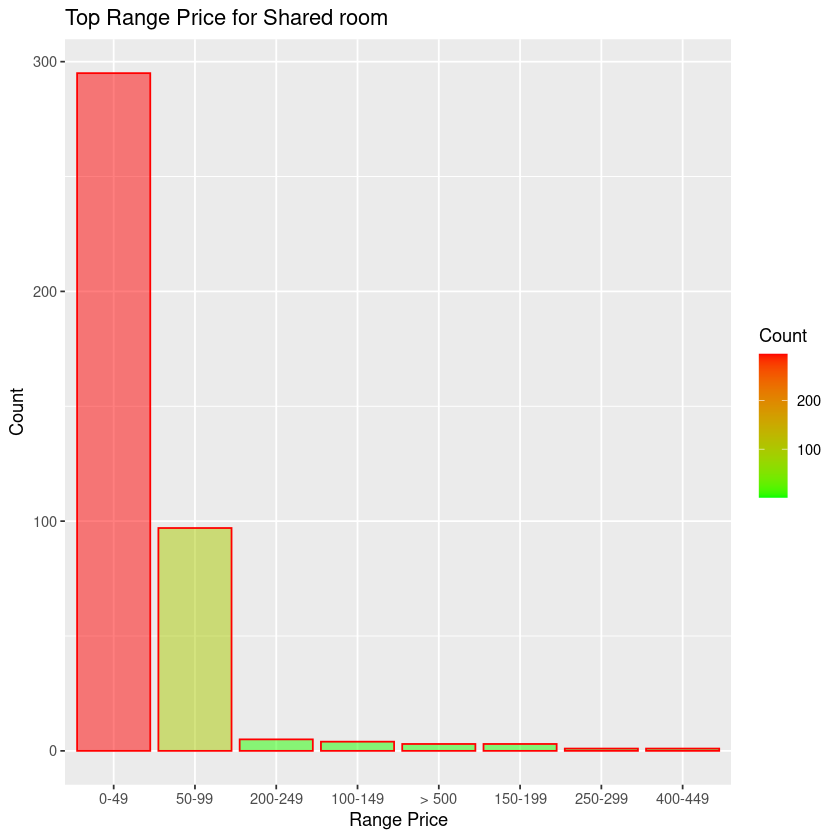

In [93]:
ggplot(shared_room_price) +
geom_bar(aes(reorder(range_price, -count), count, fill=count),
    col="red", alpha = .5, stat="identity") +
scale_fill_gradient("Count", low = "green", high = "red") +
scale_y_continuous() +
labs(title="Top Range Price for Shared room") +
labs(x="Range Price", y="Count")
ggsave("Top Range Price for Shared room.png")

In [97]:
shared_room_price <- shared_room %>% mutate(range=price %/% 50) %>%
    mutate(range_price = case_when(range == 0 ~ "0-49",
                                   range == 1 ~ "50-99",
                                   range == 2 ~ "100-149",
                                   range == 3 ~ "150-199",
                                   range == 4 ~ "200-249",
                                   range == 5 ~ "250-299",
                                   range == 6 ~ "300-349",
                                   range == 7 ~ "350-399",
                                   range == 8 ~ "400-449",
                                   range == 9 ~ "450-499",
                                   range >= 10 ~ "> 500")) %>% group_by(range_price,accommodates) %>% count()

Saving 6.67 x 6.67 in image



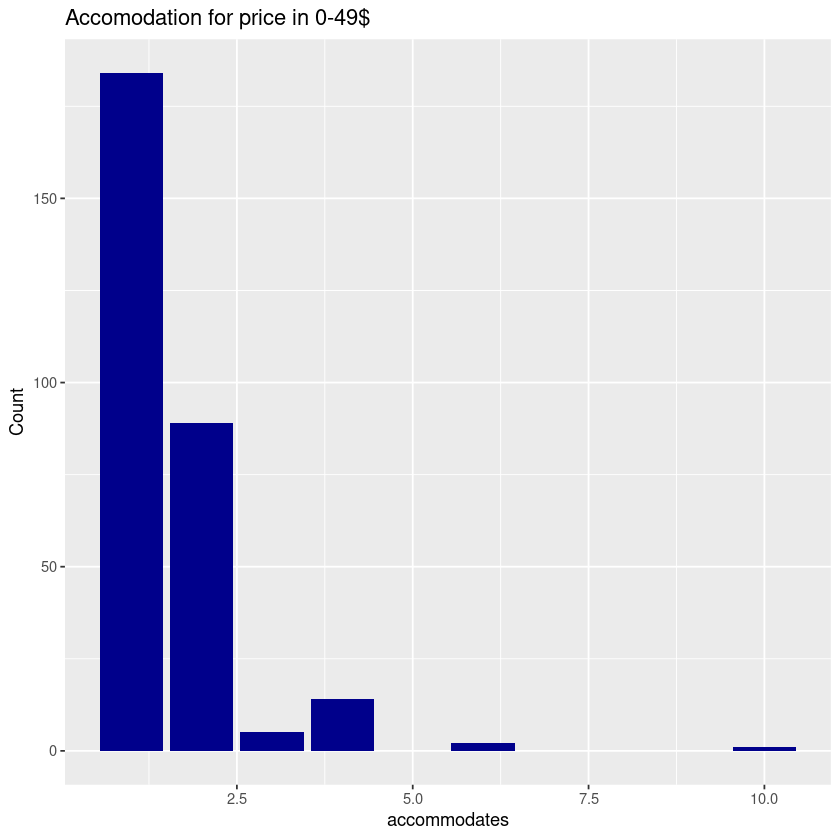

In [111]:
room_cheapest <- shared_room_price %>% filter(range_price=="0-49")
ggplot(room_cheapest,aes(x=accommodates,y=n)) + geom_bar(stat="identity",fill="darkblue") + labs(y="Count",title="Accomodation for price in 0-49$")
ggsave("Accomodation for price in 0-49$.png")

Saving 6.67 x 6.67 in image



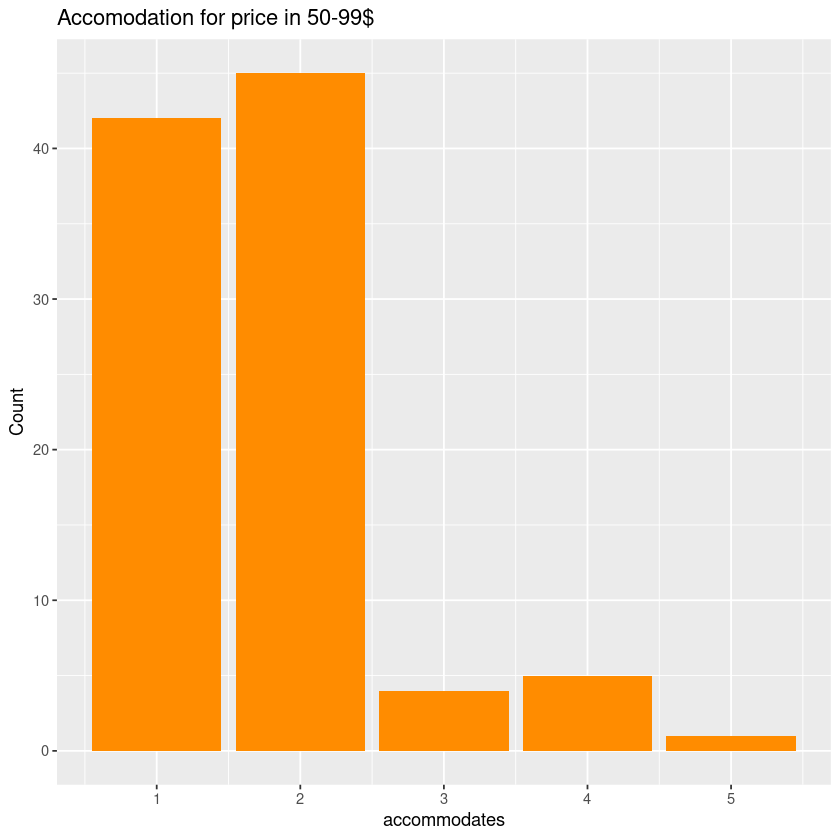

In [112]:
room_2dcheapest <- shared_room_price %>% filter(range_price=="50-99")
ggplot(room_2dcheapest,aes(x=accommodates,y=n)) + geom_bar(stat="identity",fill="darkorange") + labs(y="Count",title="Accomodation for price in 50-99$")
ggsave("Accomodation for price in 50-99$.png")